In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn import metrics
import PIL
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop

In [2]:
# Load train dataset
train_data = pd.read_csv('train.csv')
train_images = []
train_labels = []

for _, row in train_data.iterrows():
    image_path = row['Path']
    image = PIL.Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = image.resize((64, 64))  # Resize image
    train_images.append(np.array(image))
    train_labels.append(row['ClassId'])

# Convert lists to numpy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)

# Load test dataset
test_data = pd.read_csv('test.csv')
test_images = []
test_labels = []

for _, row in test_data.iterrows():
    image_path = row['Path']
    image = PIL.Image.open(image_path).convert('RGB')  # Convert image to RGB
    image = image.resize((64, 64))  # Resize image
    test_images.append(np.array(image))
    test_labels.append(row['ClassId'])

# Convert lists to numpy arrays
x_test = np.array(test_images)
y_test = np.array(test_labels)

print('Train images shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Test images shape:', x_test.shape)
print('Test labels shape:', y_test.shape)


Train images shape: (39209, 64, 64, 3)
Train labels shape: (39209,)
Test images shape: (12630, 64, 64, 3)
Test labels shape: (12630,)


In [3]:
# Initialize the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(43, activation='softmax'),  # 43 classes
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        102464    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [4]:
model.save_weights('cnn_1.h5')

395/395 [==============================] - 22s 56ms/step


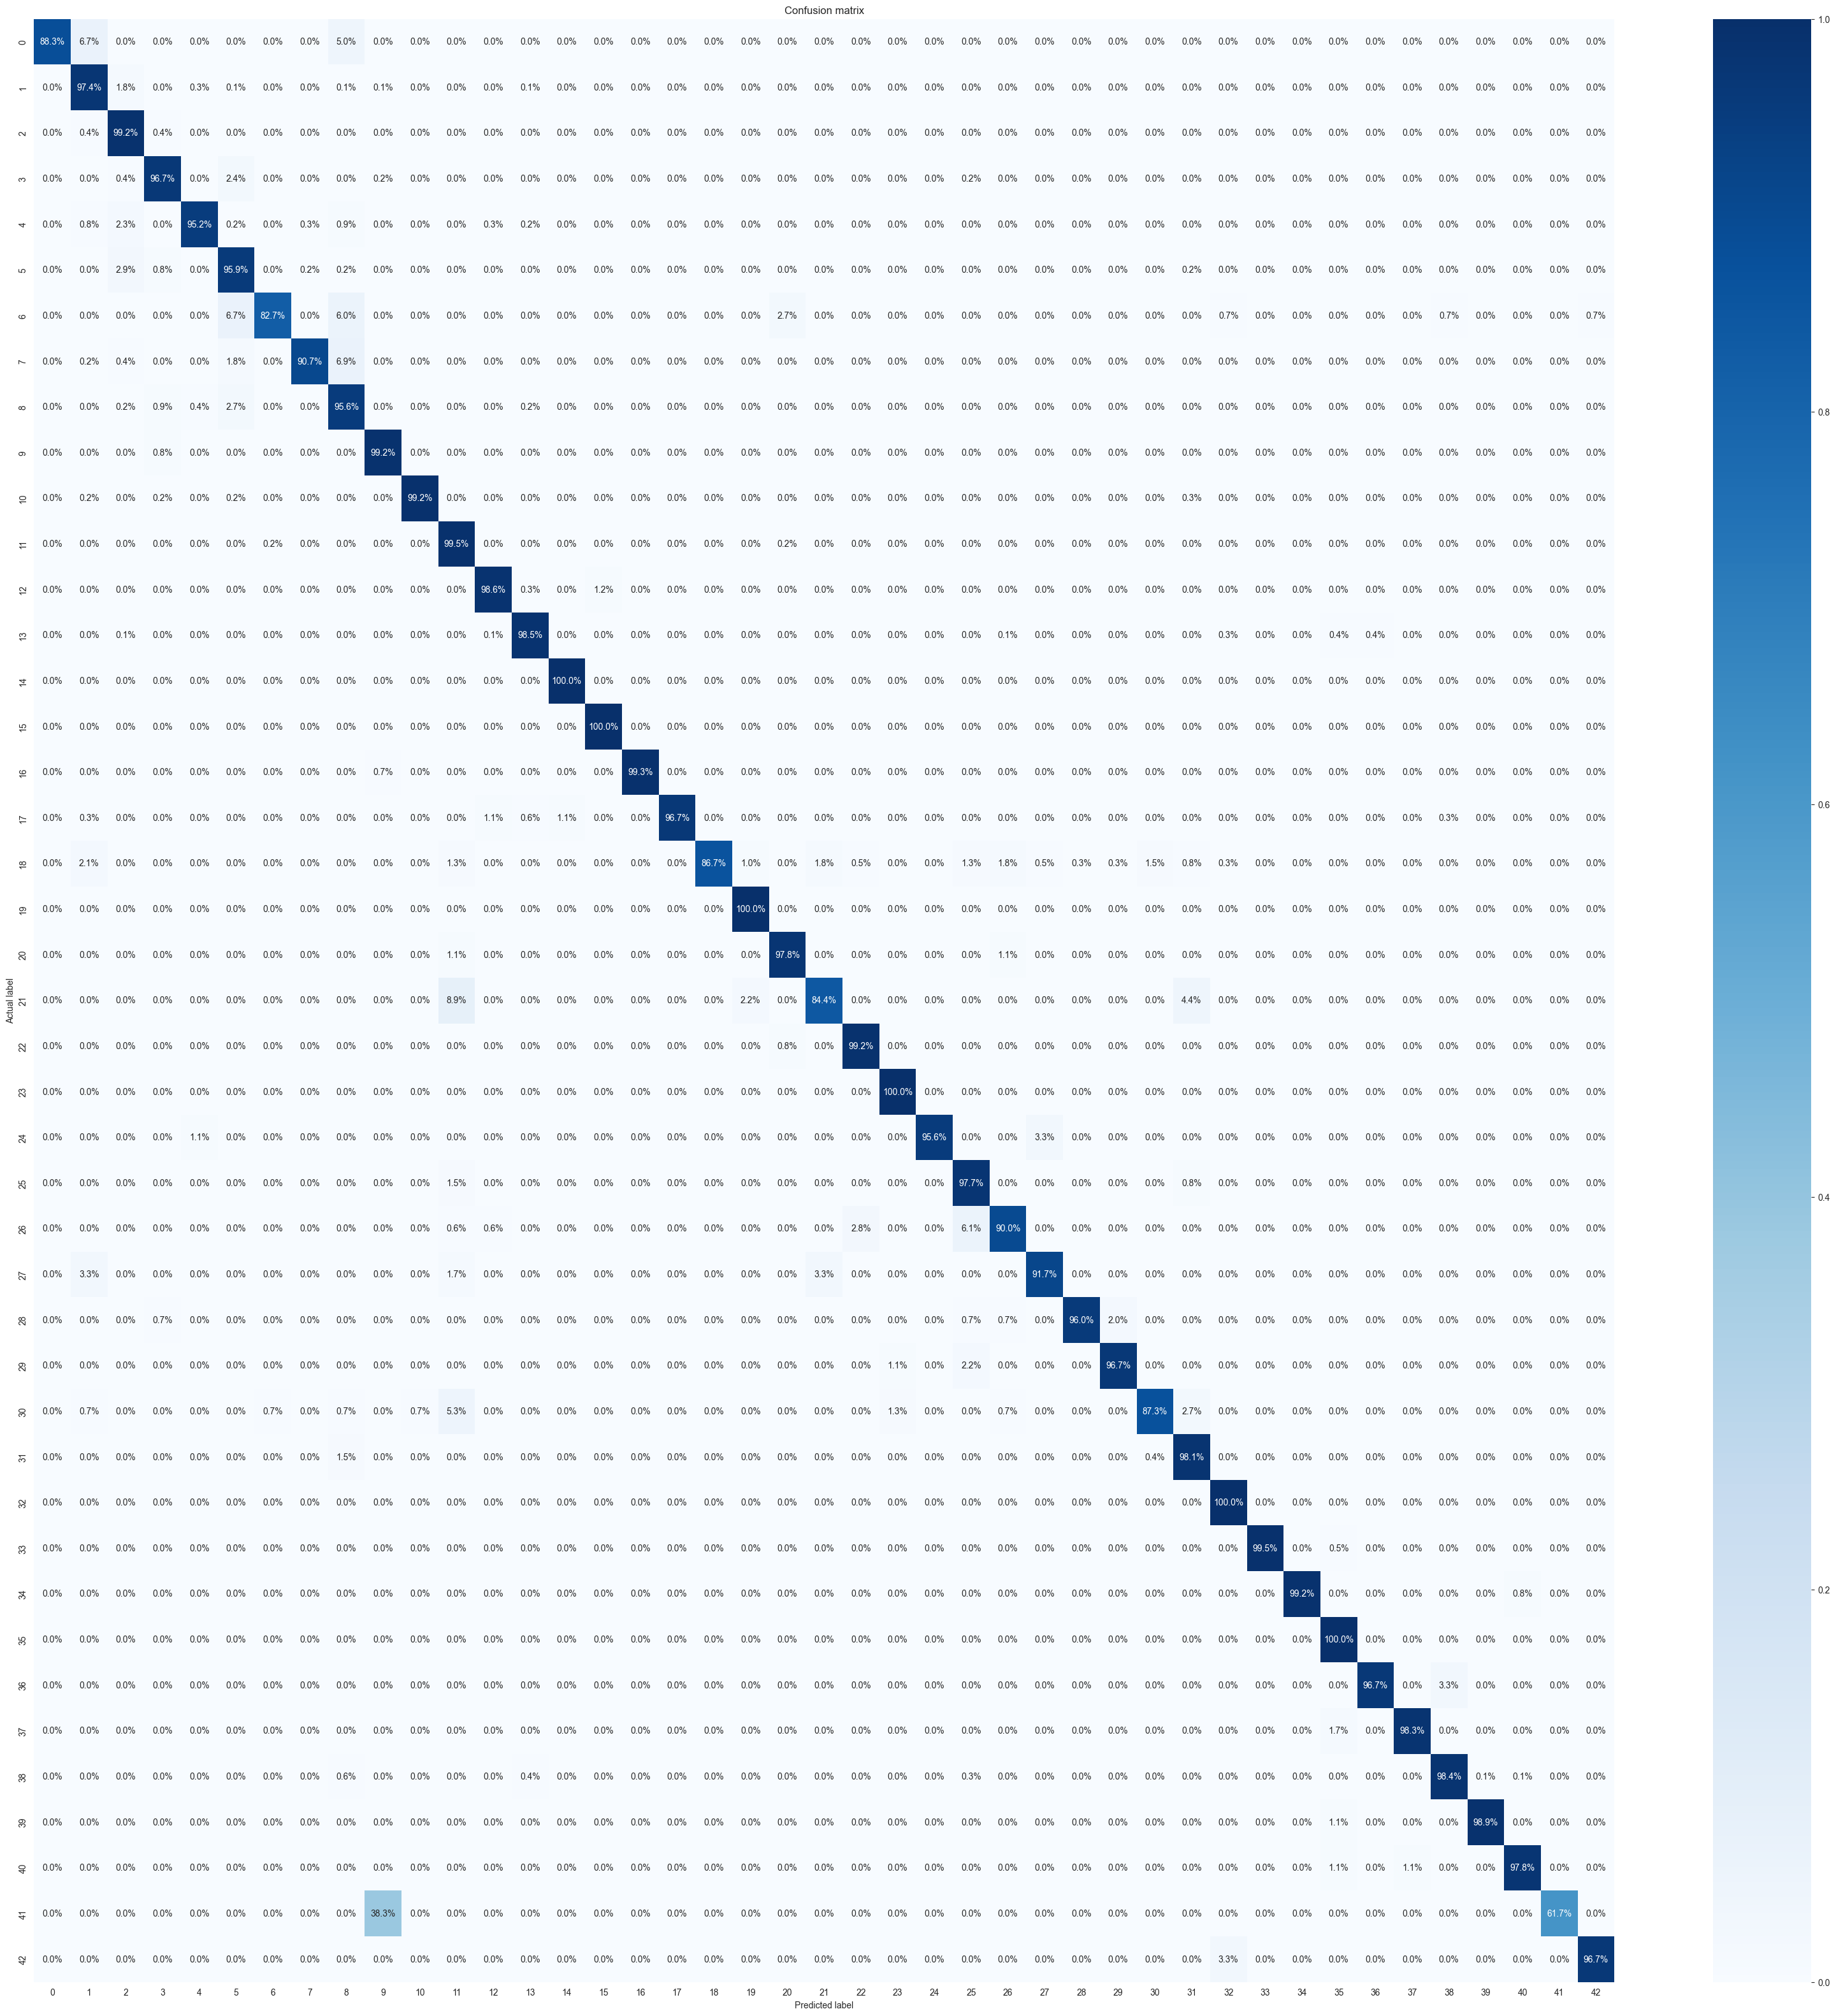

In [5]:
# Prediction labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred_classes)

# Convert the matrix to percentages
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Show the Confusion matrix
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, fmt=".1%", cmap='Blues')  # change format to percentage
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [6]:
from sklearn.metrics import classification_report

# 首先你需要得到模型在测试集上的预测值
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# 然后你可以使用 classification_report 来计算各项指标
report = classification_report(y_test, y_pred_classes, output_dict=True)

print("总精度：", report['accuracy'])
print("总精度：", report['macro avg']['precision'])
print("总召回率：", report['macro avg']['recall'])
print("总F1分数：", report['macro avg']['f1-score'])

395/395 [==============================] - 17s 42ms/step
总精度： 0.9663499604117182
总精度： 0.9657774315991811
总召回率： 0.9536420722950045
总F1分数： 0.9578822855479506
